# Testing

## Importing libraries

In [101]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, precision_score, recall_score, f1_score
)
from joblib import load

## Selecting the dataset

In [103]:
datasets = ['binary_cic_ids_2017', 'cic_ids_2017', 'binary_nsl_kdd', 'nsl_kdd', 'binary_unsw_nb15', 'unsw_nb15']

dataset = datasets[1]

## Selecting the classifier

In [104]:
classifiers = ['AB', 'GB', 'KNN', 'LDA', 'LR', 'NB', 'RF']

classifier = classifiers[6]

## Loading the data

In [105]:
# Load the trained model
model = load(f'../trained-models/{dataset}_{classifier}.joblib')

# Load the test data
test = pd.read_csv(f"../processed-datasets/{dataset}_test_normalized.csv")

## Splitting into X and y

In [106]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

## Testing

In [107]:
# Start time
start_time_test = time.time()

# Make predictions on the test data
y_pred = model.predict(X_test)

# End time
end_time_test = time.time()

# Testing time
testing_time = end_time_test - start_time_test

print(f'Testing Time: {testing_time} seconds')

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Tempo de Teste: 12.573193550109863 segundos


## Adding the testing time to a DataFrame

In [108]:
# Try to load the CSV file
try:
    times = pd.read_csv(f"../results/{dataset}_testing_times.csv")
except:
    # If the file does not exist, create an empty DataFrame
    times = pd.DataFrame()

In [109]:
new_line = pd.DataFrame({'Classifier': [f'{classifier}'],
                         'Testing Time': round(testing_time, 4)})

times = pd.concat([times, new_line], ignore_index=True)

In [110]:
times

,Classificador,Teste
0,AB,16.8556
1,KNN,1338.5741
2,LDA,0.2722
3,LR,0.2518
4,NB,0.2532
5,RF,12.4665
6,GB,36.1591
7,AB,17.7556
8,KNN,1256.1247
9,LDA,0.2820


In [111]:
# Saving the DataFrame
times.to_csv(f"../results/{dataset}_testing_times.csv", index=False)

## Model Evaluation

### Accuracy, Balanced Accuracy, and Accuracy per Class

In [112]:
# Accuracy
total_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(total_accuracy, 4)}')

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {round(balanced_accuracy, 4)}')

# Dictionary to store the accuracy of each class
class_accuracies = {}

class_labels = sorted(list(set(y_test)))

# Iterate over all unique classes present in the true labels
for class_label in class_labels:
    # Filter predictions and true labels for the current class
    true_class_indices = [i for i, label in enumerate(y_test) if label == class_label]
    class_predictions = [y_pred[i] for i in true_class_indices]
    true_class_labels = [y_test[i] for i in true_class_indices]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_class_labels, class_predictions)
    
    # Store the class accuracy in the dictionary
    class_accuracies[class_label] = class_accuracy

# Rounding the values in the dictionary
rounded_dictionary = {key: round(value, 4) for key, value in class_accuracies.items()}

# Print the accuracy of each class
for class_label, accuracy in class_accuracies.items():
    print(f'Accuracy of class {class_label}: {accuracy}')

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Acurácia: 0.9975


c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Acurácia Balanceada: 0.7282
Acurácia da classe BENIGN: 0.9992746268941624
Acurácia da classe Bot: 0.4765217391304348
Acurácia da classe DDoS: 0.9995826595023215
Acurácia da classe DoS GoldenEye: 0.9945547725816785
Acurácia da classe DoS Hulk: 0.9934691995927853
Acurácia da classe DoS Slowhttptest: 0.9892131979695431
Acurácia da classe DoS slowloris: 0.9920537897310513
Acurácia da classe FTP-Patator: 0.997155858930603
Acurácia da classe Heartbleed: 0.8
Acurácia da classe Infiltration: 0.75
Acurácia da classe PortScan: 0.9994153756211634
Acurácia da classe SSH-Patator: 0.9316770186335404
Acurácia da classe Web Attack - Brute Force: 0.0
Acurácia da classe Web Attack - Sql Injection: 0.0
Acurácia da classe Web Attack - XSS: 0.0


### Precision, Recall, and F1-Score

In [113]:
# Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {round(precision, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'F1-score: {round(f1, 4)}\n')

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Precisão: 0.9974
Revocação: 0.9975
F1-measure: 0.9974



### Metrics per class

In [114]:
# Metrics per class
report = classification_report(y_test, y_pred)
print(f'Metrics per class:\n{report}')

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Métricas por classe:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    628642
                       Bot       0.84      0.48      0.61       575
                      DDoS       1.00      1.00      1.00     38338
             DoS GoldenEye       1.00      0.99      1.00      3122
                  DoS Hulk       1.00      0.99      1.00     52061
          DoS Slowhttptest       0.95      0.99      0.97      1576
             DoS slowloris       1.00      0.99      0.99      1636
               FTP-Patator       1.00      1.00      1.00      1758
                Heartbleed       1.00      0.80      0.89         5
              Infiltration       1.00      0.75      0.86         8
                  PortScan       0.99      1.00      0.99     27368
               SSH-Patator       1.00      0.93      0.96       966
  Web Attack - Brute Force       0.00      0.00      0.00       448
Web Attack - Sql Injection

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rafac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

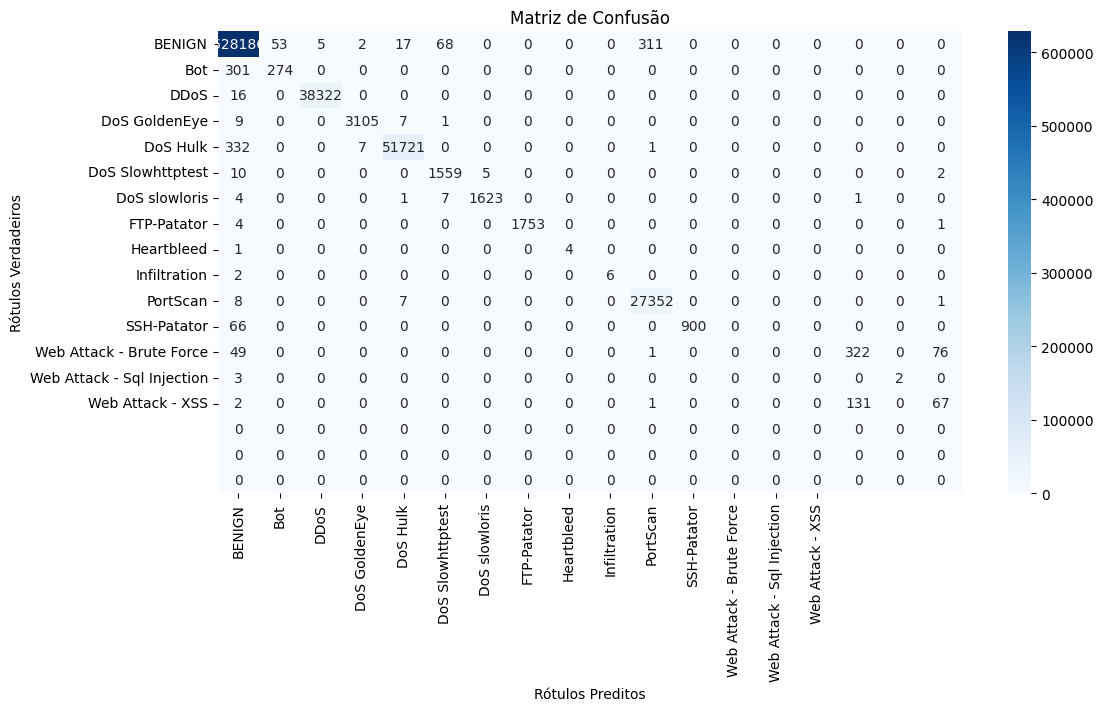

In [115]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Adding the metric values to a DataFrame

In [116]:
# Try to load the CSV file
try:
    evaluation = pd.read_csv(f"../results/{dataset}_models_evaluation.csv")
except:
    # If the file does not exist, create an empty DataFrame
    evaluation = pd.DataFrame()

In [117]:
# Add a row to the DataFrame with the provided data
row_data = {
    'Classifier': classifier,
    'Accuracy': round(total_accuracy, 4),
    'Balanced Accuracy': round(balanced_accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1-Score': round(f1, 4)
}

row_data.update(class_accuracies)

In [118]:
new_line = pd.DataFrame([row_data])

evaluation = pd.concat([evaluation, new_line], ignore_index=True)

In [119]:
evaluation

,Classificador,Acurácia,Acurácia Balanceada,Precisão,Revocação,F1-Score,BENIGN,Bot,DDoS,DoS GoldenEye,...,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS,Web Attack - Brute Force,Web Attack - Sql Injection,Web Attack - XSS
0,AB,0.8858,0.1758,0.8097,0.8858,0.8435,0.992250,0.000000,0.000000,0.000961,...,0.0,0.75,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN
1,KNN,0.9979,0.8145,0.9979,0.9979,0.9979,0.998753,0.753043,0.997731,0.994234,...,0.8,0.25,0.999525,0.964803,0.754464,0.4,0.348259,NaN,NaN,NaN
2,LDA,0.9052,0.5839,0.9322,0.9052,0.9148,0.935687,0.008696,0.567035,0.771941,...,1.0,0.25,0.987175,0.913043,0.803571,0.0,0.000000,NaN,NaN,NaN
3,LR,0.9474,0.3612,0.9471,0.9474,0.9450,0.974760,0.000000,0.718008,0.611467,...,0.0,0.00,0.984727,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN
4,NB,0.8823,0.2027,0.8536,0.8823,0.8635,0.963795,0.000000,0.466222,0.075913,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN
5,RF,0.9980,0.8250,0.9979,0.9980,0.9979,0.999275,0.476522,0.999583,0.994555,...,0.8,0.75,0.999415,0.931677,0.718750,0.4,0.333333,NaN,NaN,NaN
6,GB,0.9908,0.5620,0.9905,0.9908,0.9894,0.997242,0.342609,0.997783,0.894299,...,0.8,0.25,0.991267,0.037267,0.071429,0.0,0.024876,NaN,NaN,NaN
7,AB,0.8858,0.1758,0.8097,0.8858,0.8435,0.992250,0.000000,0.000000,0.000961,...,0.0,0.75,0.000000,0.000000,NaN,NaN,NaN,0.0,0.0,0.0
8,KNN,0.9974,0.7143,0.9974,0.9974,0.9974,0.998753,0.753043,0.997731,0.994234,...,0.8,0.25,0.999525,0.964803,NaN,NaN,NaN,0.0,0.0,0.0
9,LDA,0.9048,0.5303,0.9322,0.9048,0.9147,0.935687,0.008696,0.567035,0.771941,...,1.0,0.25,0.987175,0.913043,NaN,NaN,NaN,0.0,0.0,0.0


In [120]:
# Saving the DataFrame
evaluation.to_csv(f"../results/{dataset}_models_evaluation.csv", index=False)